In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [ ]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,1
1,George Soros ban Russia Pakistan Turkey Hung...,1
2,U N call decriminalize sex minor,1
3,Scientists struggle understand Antarctica wa...,1
4,La Reserva Federal present su nuevo sistema ...,1


In [ ]:
df['Label'].value_counts()[1]

68738

In [ ]:
df['Label'].value_counts()[0]

58682

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
x=df['Lemma']
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
x_train.head()

52433       LILONGWE Reuters Three Malawian minister tes...
116680      Donald Trump want boo lampoon next four year...
63600       Filmmaker Spike Lee post photo Instagram hol...
119326      Obama New Residence money come http www rt c...
95109       FBI Agents Must Come Forward Confront Corrup...
Name: Lemma, dtype: object

In [ ]:
xv_train


<101936x182924 sparse matrix of type '<class 'numpy.float64'>'
	with 16565871 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1',C=0.28,solver='saga',max_iter=1000)
LR.fit(xv_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.28, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
training_accuracy = LR.score(xv_train, y_train)
print("Training Accuracy: {:.2f}".format(training_accuracy))

Training Accuracy: 0.62


In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.6107361481714016

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54     11781
           1       0.62      0.71      0.66     13703

    accuracy                           0.61     25484
   macro avg       0.61      0.60      0.60     25484
weighted avg       0.61      0.61      0.61     25484



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(LR, xv_train,y_train, cv=kfold, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
average_accuracy = scores.mean()

In [ ]:
average_accuracy

0.6125804225609384

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
cm = confusion_matrix(y_test, pred_lr)

In [34]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

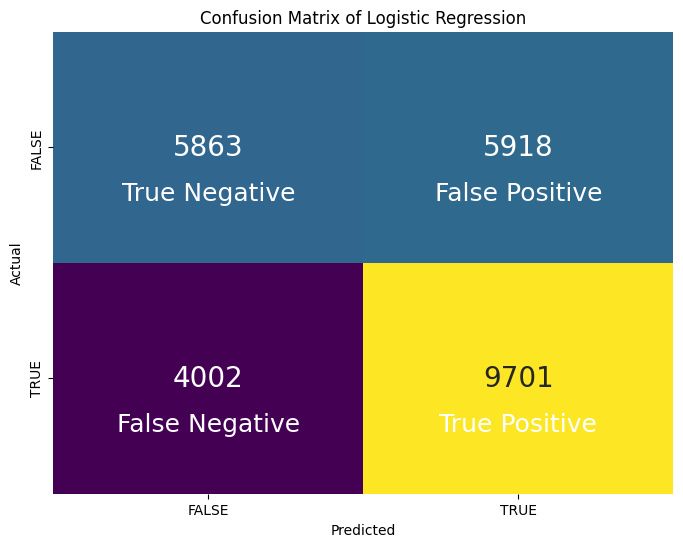

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [44]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [45]:
true_prob, pred_prob = calibration_curve(y_test, pred_lr, n_bins=10)

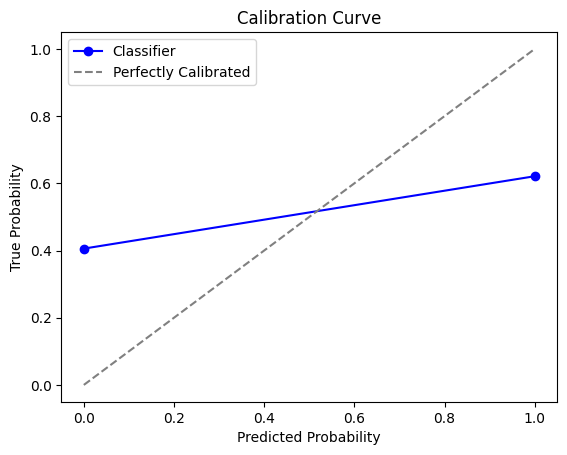

In [46]:
plt.plot(pred_prob, true_prob, marker='o', linestyle='-', color='blue', label='Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [50]:
!pip install ml_insights

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for splinecalib: filename=splinecalib-0.0.5-cp310-cp310-linux_x86_64.whl size=125529 sha256=10716a4700e14fead30dda146dc79ce853840d3c907d7cf6c7ad05904f88c7da
  Stored in directory: /root/.cache/pip/wheels/96/dc/ce/5bd043c567d2f972ff043c21e2f890960224ac295a55945009
Successfully built splinecalib


In [47]:
residuals = y_test - pred_lr

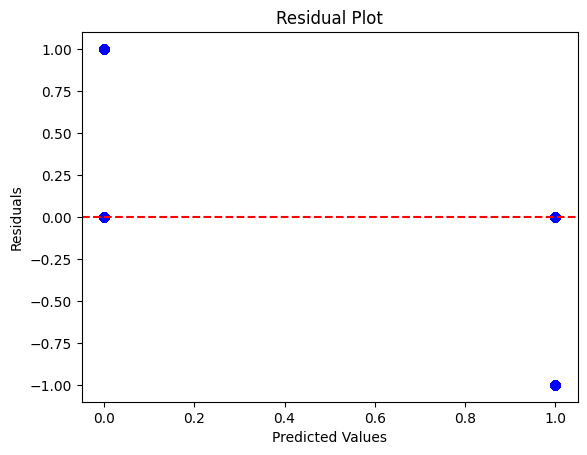

In [49]:
plt.scatter( pred_lr, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [52]:
from sklearn.metrics import precision_recall_curve

In [53]:
precision, recall, thresholds = precision_recall_curve(y_test,pred_lr)

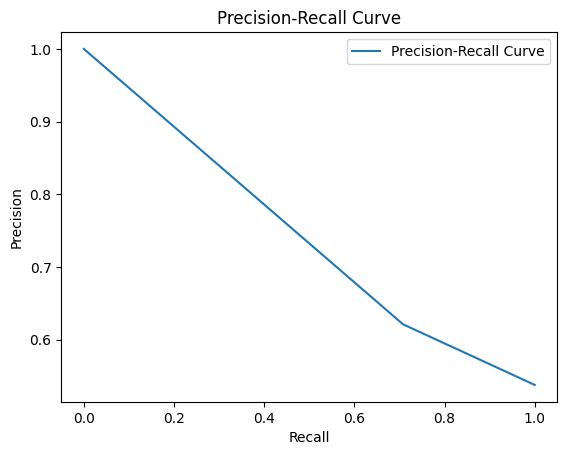

In [54]:
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

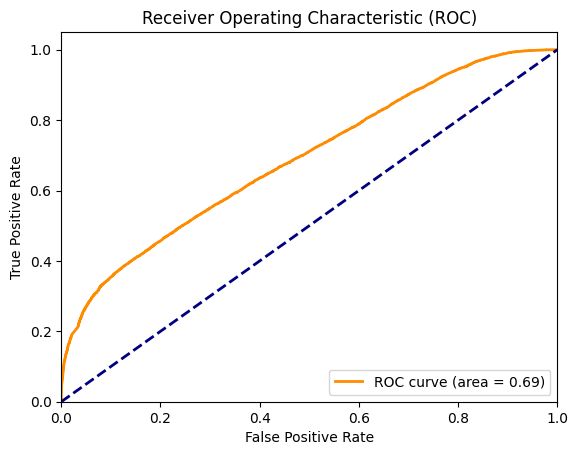

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probas = LR.predict_proba(xv_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probas)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


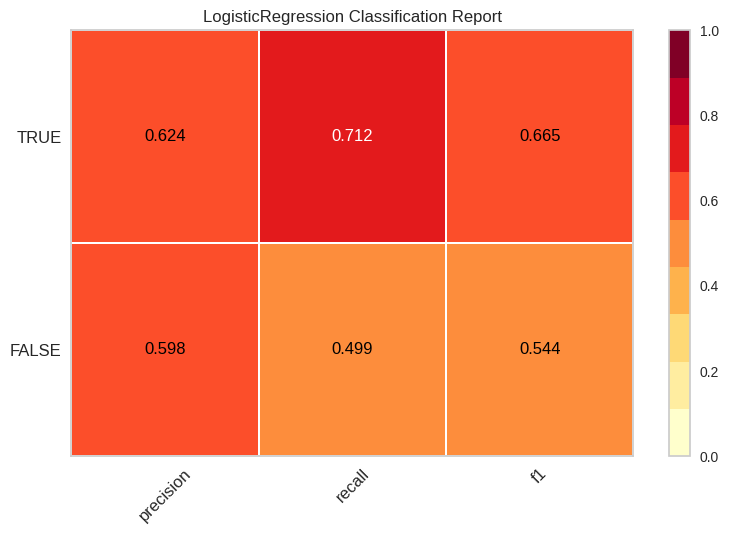

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(LR, classes=['FALSE', 'TRUE'])
visualizer.fit(xv_train, y_train)
visualizer.score(xv_test, y_test)
visualizer.show()

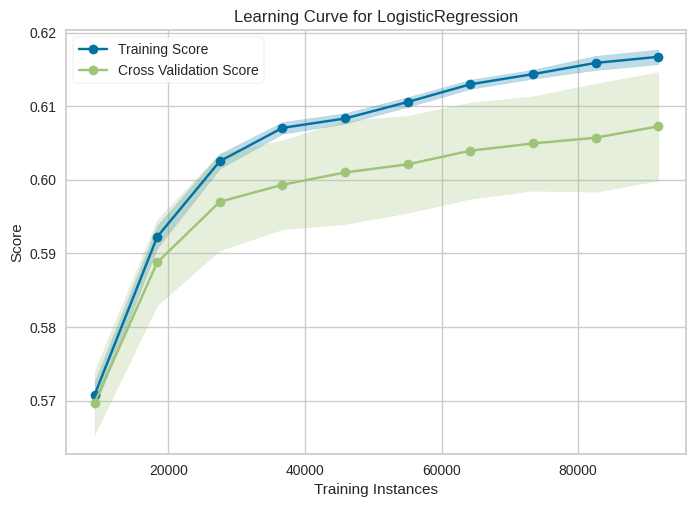

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    LR, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(xv_train, y_train)
lc_viz.show()

In [ ]:
import random

# Select a random row index from Data2
random_index = random.randint(0, len(df)-1)

# Get the text from the randomly selected row
text =df.iloc[random_index]['Lemma']


text_transformed = vectorization.transform([text])

# Use the model to predict the label of the text
label_pred = LR.predict(text_transformed)

# Print the text and predicted label
print("Text: ", text)
if label_pred == 1:
    print('The text is classified as TRUE')
else:
    print('The text is classified as FALSE')
#print("Predicted Label: ", label_pred[0])

Text:    Reckless Hillary care less seriousness expose America top secret intel world use unsecured email server would American want put charge troop would voter trust national security job Commander Chief important leave self serve grifter simply equip female genitalia ask family Shahram Amiri friend US pay ultimate price provide America Iran nuclear weapon secret Hillary crooked Secretary State Hillary Clinton use private email server discuss detail Iranian nuclear scientist execute give information CIA Shahram Amiri hang reveal secret enemy US allegedly inform Tehran extensive nuclear program Democrat controversial reign Secretary State time stress researcher free describe friend correspondence maintain kidnap intelligence agent Emails sent Clinton adviser point scandal involve Amiri suggest diplomatic psychological issue legal one One aide also warn would lead problematic news story Richard Morningstar former State Department special envoy Eurasian energy write Clinton recognize co

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = LR.coef_
intercept = LR.intercept_
x_values = np.linspace(xv_train.min(), xv_train.max(), 100)
y_values = - (intercept[0] + coefficients[0][0] * x_values) / coefficients[0][1]


<ipython-input-20-01eac9daa8fc>:7: RuntimeWarning: divide by zero encountered in true_divide
  y_values = - (intercept[0] + coefficients[0][0] * x_values) / coefficients[0][1]


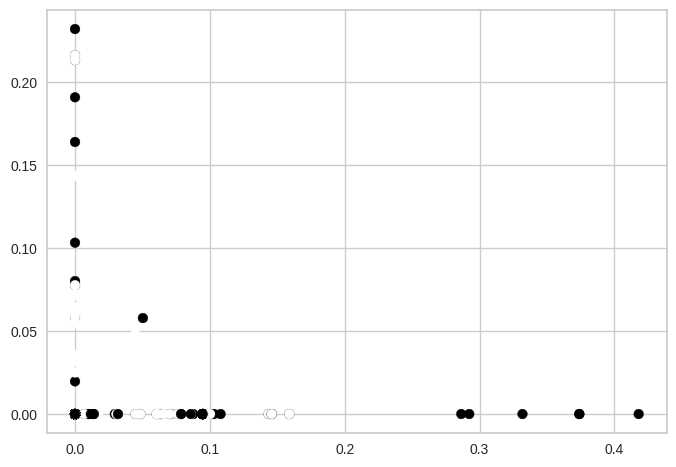

In [ ]:
plt.scatter(xv_train[:, 0].toarray(), xv_train[:, 1].toarray(), c=y_train)


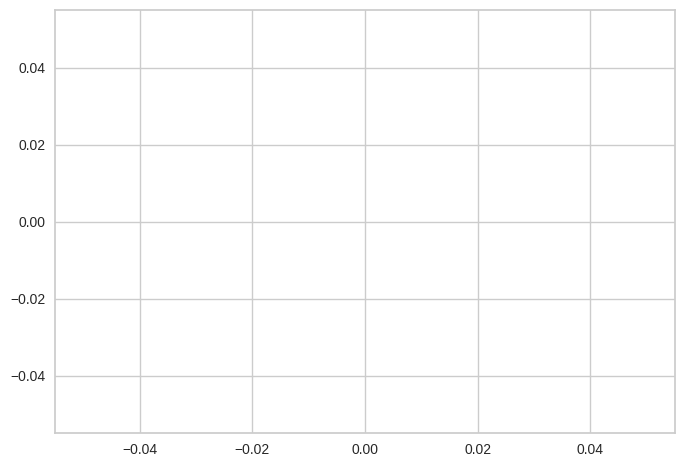

In [ ]:
plt.plot(x_values, y_values, color='red', label='Decision Boundary')


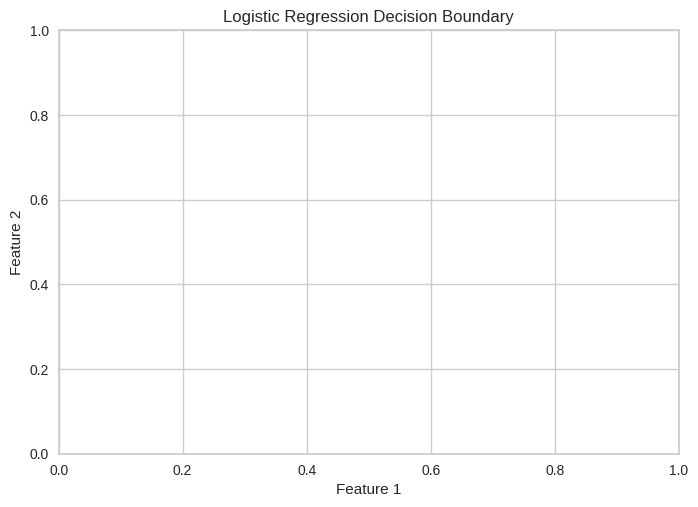

In [ ]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()
